# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.13/dataset/iris.csv')

In [6]:
target_col = 'variety'

#### Thresholds

In [7]:
threshold_NaN = 0.5

In [8]:
threshold_cat = 5

In [9]:
threshold_Z = 3.0

In [10]:
threshold_corr = 0.95

In [11]:
threshold_model = 5

In [12]:
threshold_score = 0.5

#### Drop user's columns:

In [13]:
user_drop_cols = []

Dataset before deletion

In [14]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [15]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [16]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataset copy

In [17]:
df_copy = df.copy()

### Dataset Information

In [18]:
df.shape

(150, 5)

#### Some records

In [19]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataframe structure

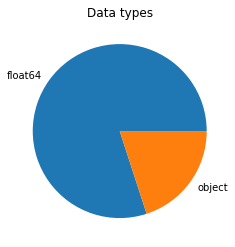

In [20]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [21]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Which columns could be categorical ?

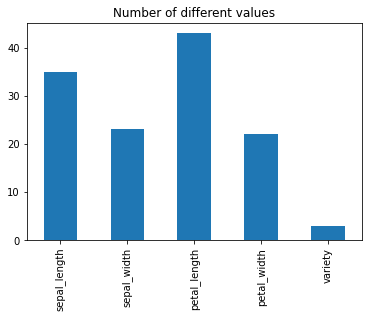

In [22]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [23]:
duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Drop NaN:

In [24]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [25]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [26]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [27]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: sepal_length
Encoding numeric column: sepal_width
Encoding numeric column: petal_length
Encoding numeric column: petal_width
Encoding object column: variety


#### Imputing NaN using IterativeImputer

##### Imputation

In [28]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [29]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 75.9%


##### Dataframe structure after compression

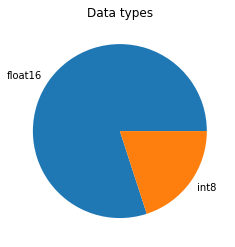

In [30]:
plot_dataframe_structure(df)

#### Outliers:

In [31]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


#### Splitting dataframe in features and targets

In [32]:
y = df[target_col]

In [33]:
X = df.drop(target_col, axis=1)

#### Check columns that should be dropped

In [34]:
print(dropped_cols)

[]


## Splittings 

In [35]:
df = df_copy

#### Splitting dataframe in features and targets

In [36]:
y = df[target_col]

In [37]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [38]:
nb_features = len(X.columns.tolist())

In [39]:
nb_targets = len(y.unique())

In [40]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [41]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

##### Encoding

In [42]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [43]:
cat_selector = make_column_selector(dtype_include=object)

In [44]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [45]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), Decorrelator(threshold_corr))

In [46]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), Decorrelator(threshold_corr))

In [47]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [48]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False), Decorrelator(threshold_corr))

In [49]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler(), Decorrelator(threshold_corr))

In [50]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Level-0 models

In [51]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('DTC', make_pipeline(tree_preprocessor, DecisionTreeClassifier(max_depth=5))), 
          ('RFC', make_pipeline(tree_preprocessor, RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto'))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('LOGR', make_pipeline(ntree_preprocessor, LogisticRegression())), 
          ('LOGRCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5))), 
          ('MLPC', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNC', make_pipeline(ntree_preprocessor, KNeighborsClassifier(n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ]

##### Level-1 model

In [52]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9])

##### Stacking for classification

In [53]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [54]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 1.46 s, sys: 90.5 ms, total: 1.55 s
Wall time: 18.8 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler()),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd0f73...
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd0f024c0>)])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

### Model evaluation

#### Model scoring

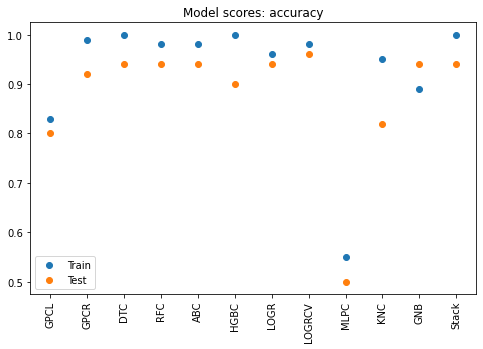

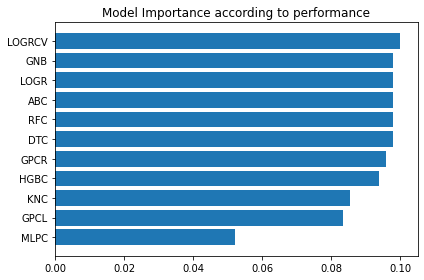

In [55]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

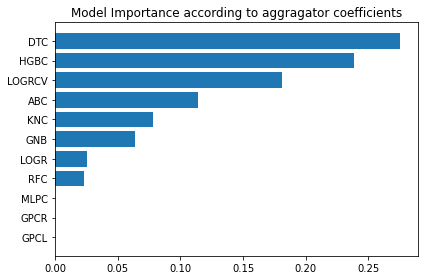

In [56]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

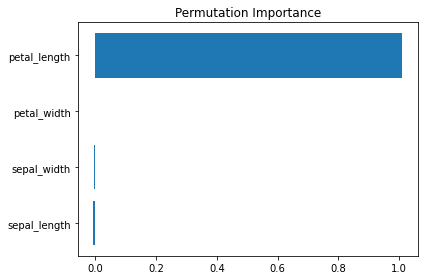

array([['sepal_length', -0.006920415224913503],
       ['sepal_width', -0.0034602076124567514],
       ['petal_width', 0.0],
       ['petal_length', 1.0103806228373702]], dtype=object)

In [57]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [58]:
features_of_interest = []

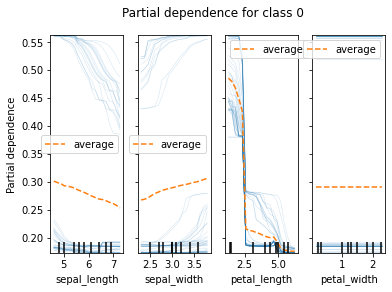

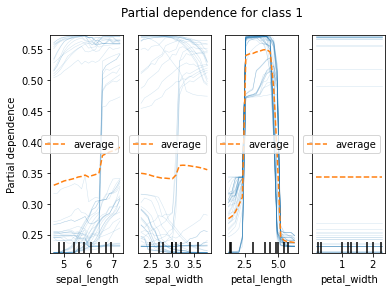

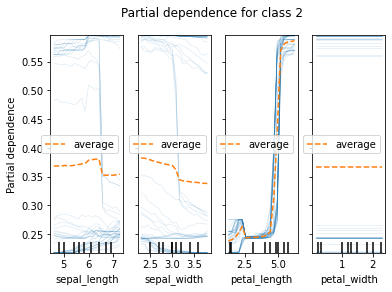

In [59]:
plot_partial_dependence(model, X_train, features_of_interest)

#### Classification report

In [60]:
K_classification_report(model, X_train, y_train, X_test, y_test)

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,29.000000
1,1.000000,1.000000,1.000000,34.000000
2,1.000000,1.000000,1.000000,37.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,100.000000
weighted avg,1.000000,1.000000,1.000000,100.000000


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,21.000000
1,0.933333,0.875000,0.903226,16.000000
2,0.857143,0.923077,0.888889,13.000000
accuracy,0.940000,0.940000,0.940000,0.940000
macro avg,0.930159,0.932692,0.930705,50.000000
weighted avg,0.941524,0.940000,0.940143,50.000000


#### Confusion matrix

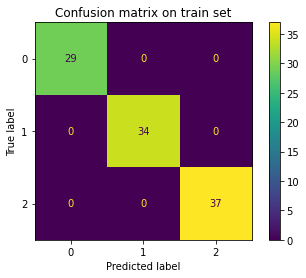

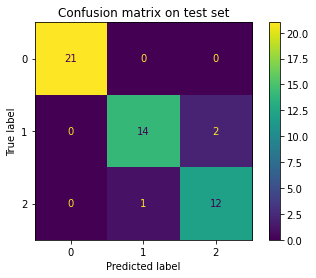

In [61]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

### Final Model

In [62]:
threshold_model = 5

In [63]:
threshold_score = 0.5

##### Filtered Level-0 models

In [64]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [65]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9])

##### Build final model

In [66]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [67]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 1 s, sys: 12.4 ms, total: 1.02 s
Wall time: 6.04 s


StackingClassifier(estimators=[('DTC',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd0f73cd0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[(...
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdfd0f024c0>)])),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=3))]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

#### Final Model scoring

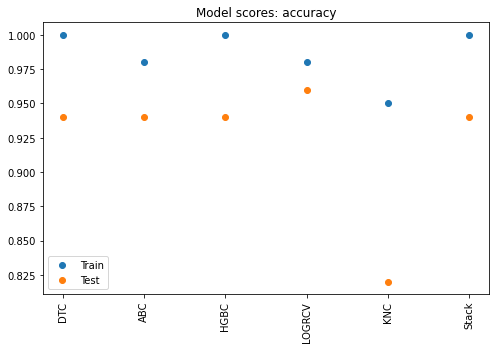

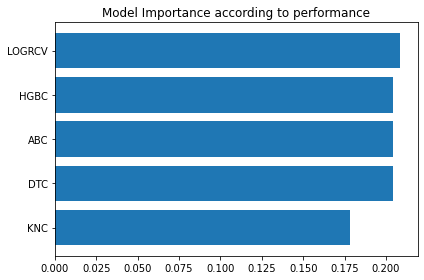

(array([['DTC', 1.0, 0.94],
        ['ABC', 0.98, 0.94],
        ['HGBC', 1.0, 0.94],
        ['LOGRCV', 0.98, 0.96],
        ['KNC', 0.95, 0.82],
        ['Stack', 1.0, 0.94]], dtype=object),
 array([['KNC', 0.1782608695652174],
        ['DTC', 0.20434782608695654],
        ['ABC', 0.20434782608695654],
        ['HGBC', 0.20434782608695654],
        ['LOGRCV', 0.20869565217391306]], dtype=object))

In [68]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

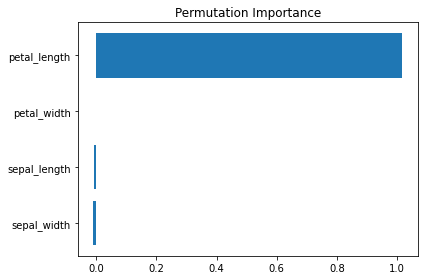

array([['sepal_width', -0.010000000000000012],
       ['sepal_length', -0.006666666666666675],
       ['petal_width', 0.0],
       ['petal_length', 1.0166666666666666]], dtype=object)

In [69]:
plot_perm_importance(model, X_test, y_test)

#### Final Classification report

In [70]:
K_classification_report(model, X_train, y_train, X_test, y_test)

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,29.000000
1,1.000000,1.000000,1.000000,34.000000
2,1.000000,1.000000,1.000000,37.000000
accuracy,1.000000,1.000000,1.000000,1.000000
macro avg,1.000000,1.000000,1.000000,100.000000
weighted avg,1.000000,1.000000,1.000000,100.000000


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,21.000000
1,0.933333,0.875000,0.903226,16.000000
2,0.857143,0.923077,0.888889,13.000000
accuracy,0.940000,0.940000,0.940000,0.940000
macro avg,0.930159,0.932692,0.930705,50.000000
weighted avg,0.941524,0.940000,0.940143,50.000000


#### Final Confusion matrix

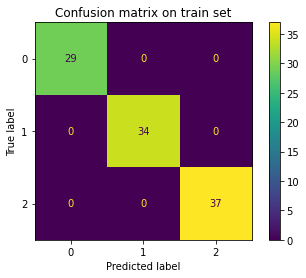

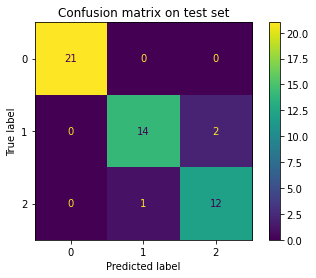

In [71]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

## Deployment

### Save your model

In [72]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [73]:
fastapi_server(model, 'model.sav', X, y)

### Start your server

In [ ]:
run server.py

INFO:     Started server process [17779]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:36096 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:36098 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:36098 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:36104 - "POST /predict HTTP/1.1" 200 OK


### Test your API at http://127.0.0.1:8000/docs